<a href="https://colab.research.google.com/github/ariza08/Pengukuran-Kinerja-Error-Model-Supervised-Learning/blob/main/Classification_code_titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_titanic.csv to train_titanic.csv


1. LOAD DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("train_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


2. Pembersihan dan Pra-Pemrosesan Data (Preprocessing) :

In [ ]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ["Pclass", "SibSp", "Parch"]
existing_columns = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=existing_columns)

# Mengisi nilai kosong pada kolom
data.fillna({'Age': data['Age'].median()}, inplace=True)
data.fillna({'Cabin': data['Cabin'].mode()[0]}, inplace=True)

# Mengubah kolom kategorik menjadi numerik (encoding)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [ ]:
print(data.columns)
data.head()

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,B96 B98,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1.0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,B96 B98,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,0.0
4,5,0,"Allen, Mr. William Henry",0,35.0,373450,8.0500,B96 B98,0.0


3. Memisahkan Fitur dan Target

In [ ]:
X = data.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = data["Survived"]

4. Split Data Latih dan Uji

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 5. Membuat dan Melatih Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

6. Melakukan Prediksi

In [ ]:
y_pred = model.predict(X_test)

7. Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6871508379888268
F1 Score: 0.5942028985507246


8. Visualisasi Decision Tree

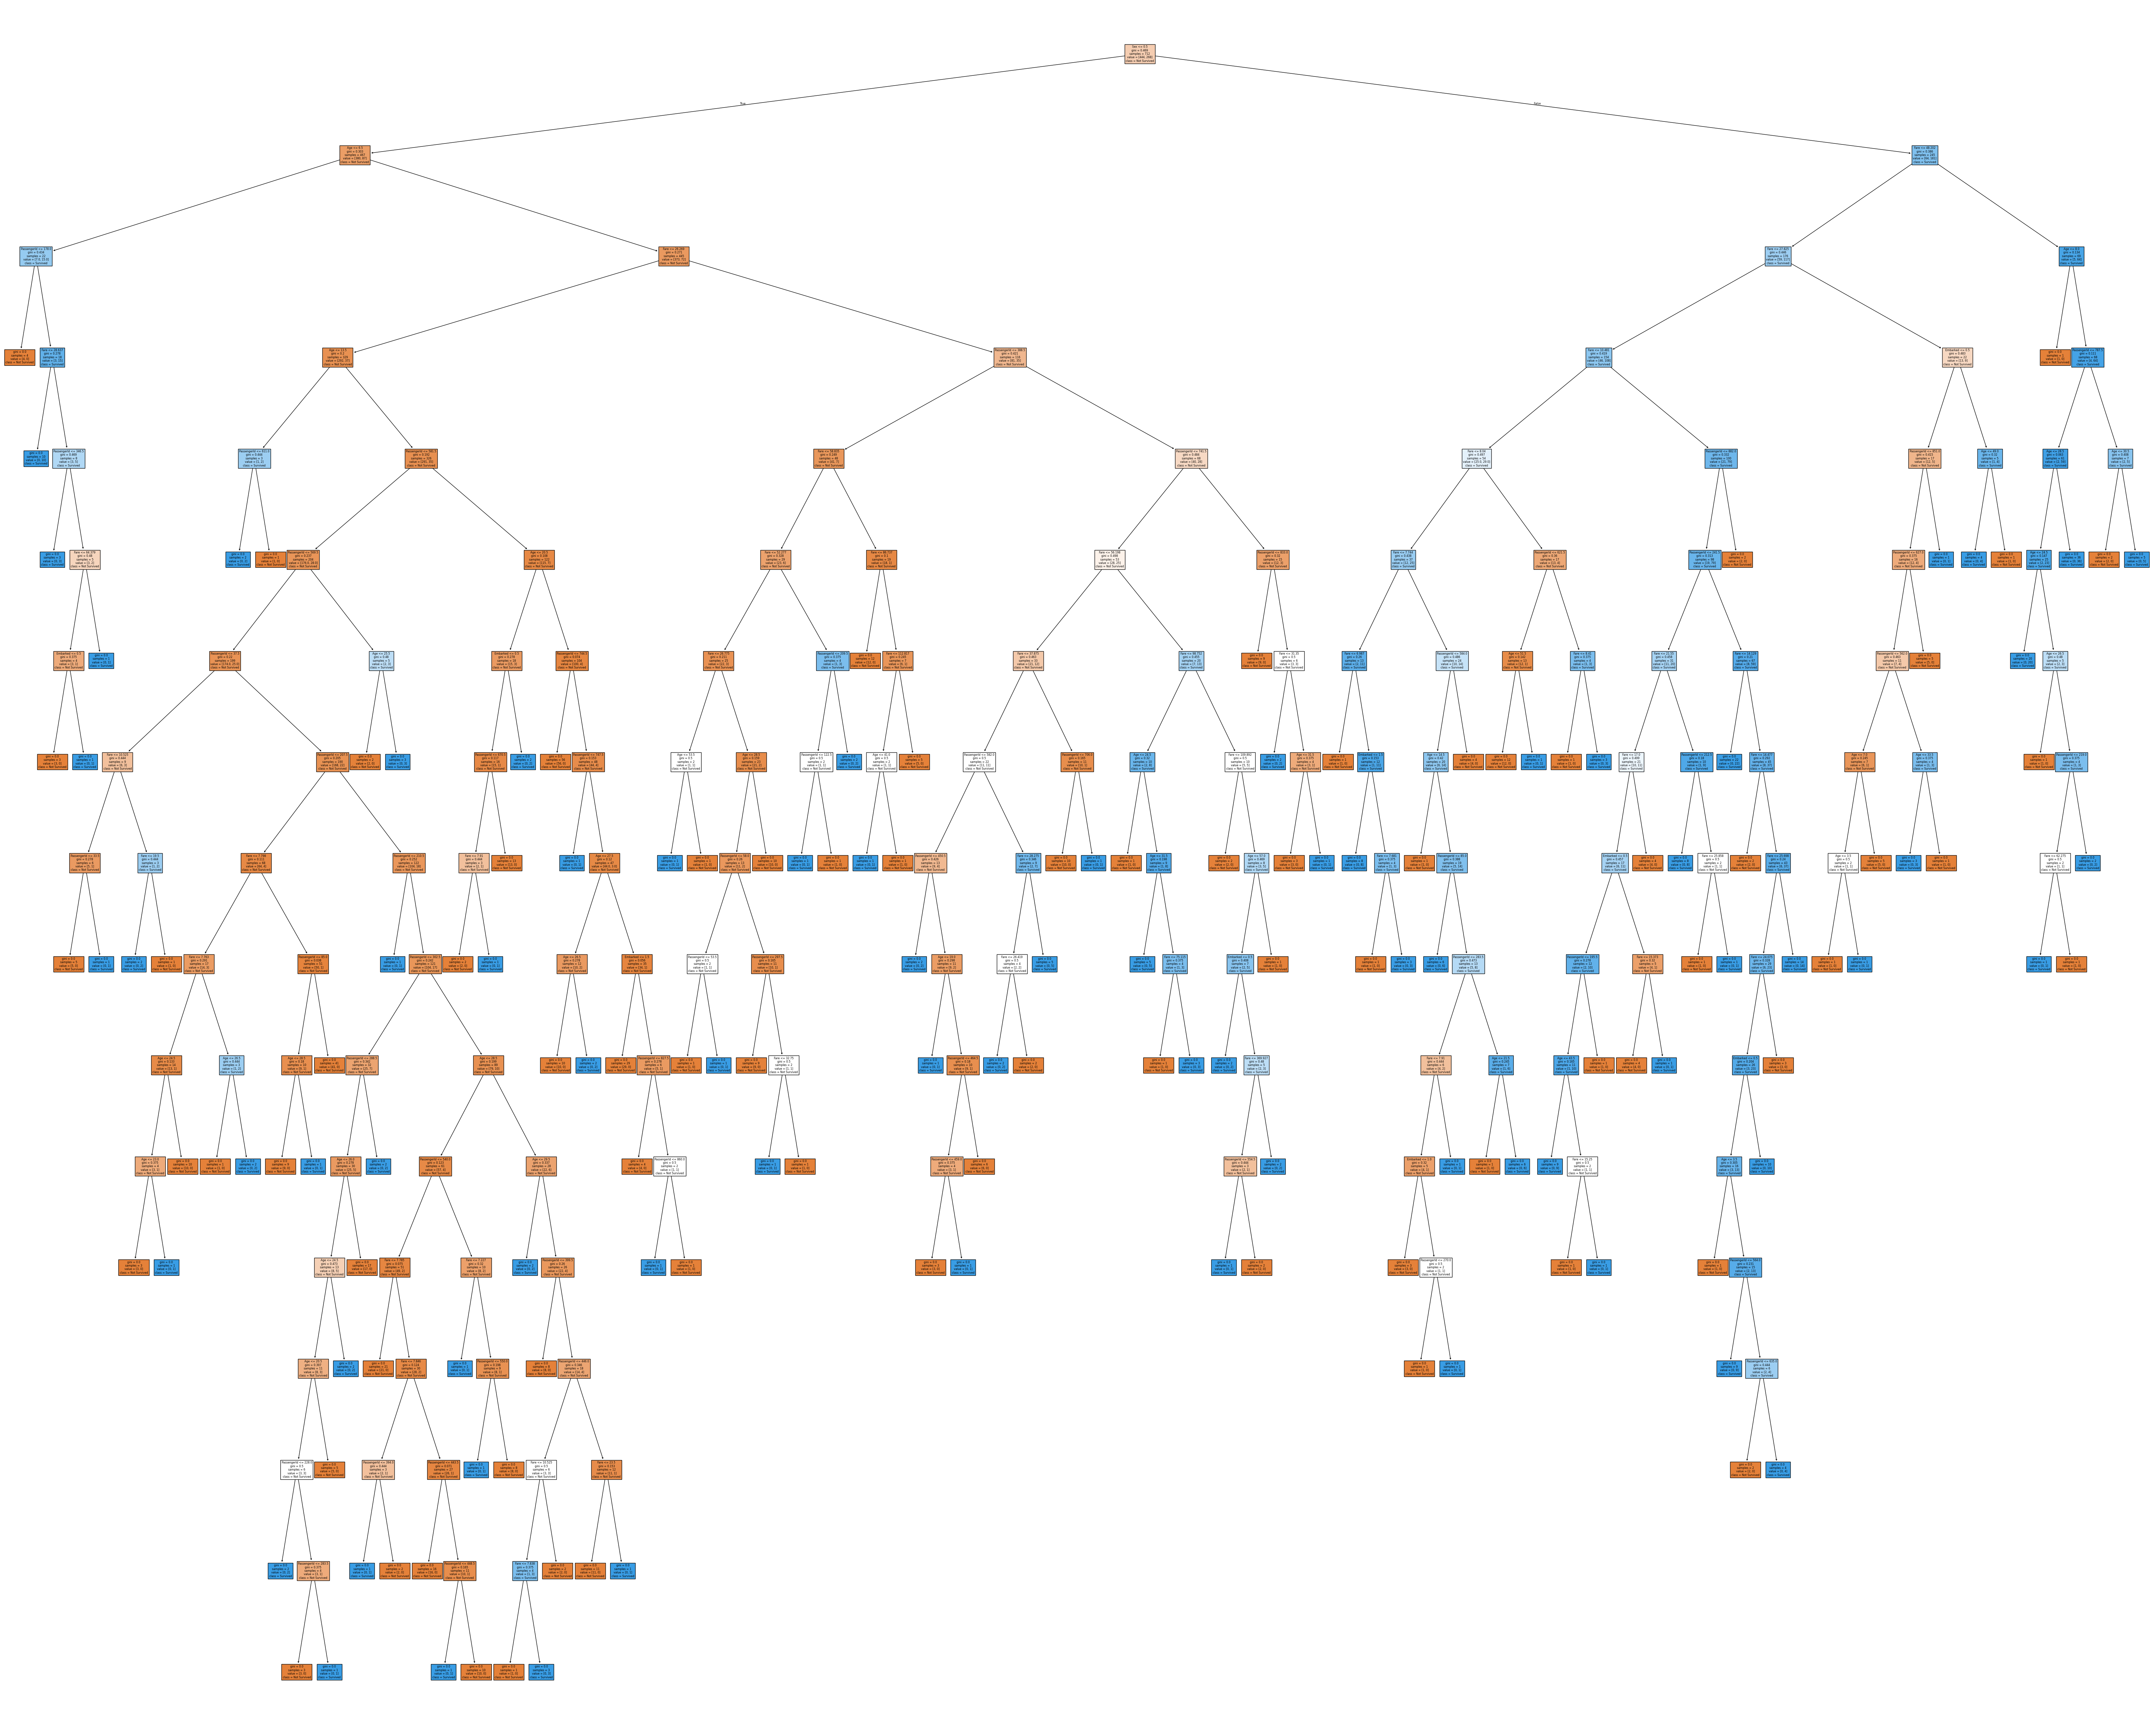

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(82, 66))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.show()

9. (Bonus) Jumlah Penumpang yang Selamat dan Tidak Selamat Berdasarkan Gender

Survived    0    1
Sex               
0         468  109
1          81  233


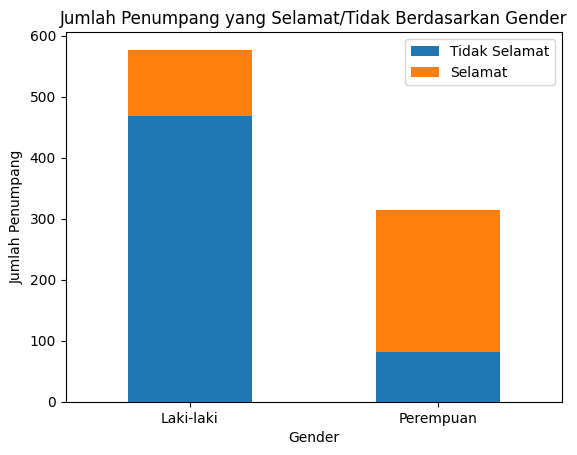

In [ ]:
#Jumlah penumpang berdasarkan gender
gender_survival = data.groupby(['Sex', 'Survived']).size().unstack()

print(gender_survival)

gender_survival.plot(kind='bar', stacked=True)
plt.title("Jumlah Penumpang yang Selamat/Tidak Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah Penumpang")
plt.xticks(ticks=[0, 1], labels=["Laki-laki", "Perempuan"], rotation=0)
plt.legend(["Tidak Selamat", "Selamat"])
plt.show()